In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

/home/rosina/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('../../capstone_data/Azimuth/clean/project_a1e0_featurized.csv')
df.dropna(inplace=True)
df.info()
df['t'] = pd.to_datetime(df['t'], format='%Y-%m-%d %H:%M:%S')
df.sort_values('t',inplace=True)
df = df.set_index('t')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 10584
Columns: 123 entries, t to v3_D_mean
dtypes: float64(82), int64(38), object(3)
memory usage: 10.0+ MB


In [18]:
for c in df.columns:
    print c

project_id
relay
load_v1rms
load_v2rms
load_v3rms
load_i1rms
load_i2rms
laod_i3rms
year
day
relay_est
t_diff
power_1
power_2
power_3
power_all
data_issue
begin_gen
power_all_old
load_v1rms-1
load_v2rms-1
load_v3rms-1
load_i1rms-1
load_i2rms-1
laod_i3rms-1
relay_est-1
t_diff-1
load_v1rms-2
load_v2rms-2
load_v3rms-2
load_i1rms-2
load_i2rms-2
laod_i3rms-2
relay_est-2
t_diff-2
load_v1rms-3
load_v2rms-3
load_v3rms-3
load_i1rms-3
load_i2rms-3
laod_i3rms-3
relay_est-3
t_diff-3
load_v1rms-4
load_v2rms-4
load_v3rms-4
load_i1rms-4
load_i2rms-4
laod_i3rms-4
relay_est-4
t_diff-4
load_v1rms_H_std
load_v2rms_H_std
load_v3rms_H_std
load_i1rms_H_std
load_i2rms_H_std
laod_i3rms_H_std
relay_est_7D_sum
begin_gen_7D_sum
month_5
month_6
dayofweek_0
dayofweek_1
dayofweek_2
dayofweek_3
dayofweek_4
dayofweek_5
dayofweek_6
hour_0
hour_1
hour_2
hour_3
hour_4
hour_5
hour_6
hour_7
hour_8
hour_9
hour_10
hour_11
hour_12
hour_13
hour_14
hour_15
hour_16
hour_17
hour_18
hour_19
hour_20
hour_21
hour_22
hour_23
datetime

In [41]:
df['power_1'] = df['load_v1rms'] * df['load_i1rms']
df['power_2'] = df['load_v2rms'] * df['load_i2rms']
df['power_3'] = df['load_v3rms'] * df['laod_i3rms']
df['power_all'] = df['power_1'] +df['power_2']+df['power_3'] * 5./12

In [42]:
y = df['power_all']
y = y.fillna(y.bfill())
y = pd.DataFrame(y.resample('H').sum())

In [43]:
exog = df['T']
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [44]:
y['T-1'] = exog['T'].shift(1)
y = y.fillna(y.bfill())

In [8]:
exog = df['vap_precip']
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [9]:
y['V_precip-1'] = exog['vap_precip'].shift(1)
y = y.fillna(y.bfill())

In [10]:
exog = df['p']
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [11]:
y['p-1'] = exog['p'].shift(1)
y = y.fillna(y.bfill())

In [12]:
feature = 'cloud-2'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [13]:
y['cloud-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [14]:
feature = 'v3'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [15]:
y['v3-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [16]:
feature = 'rho'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [20]:
y['rho-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [23]:
feature = 'relay_est_7D_sum'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [24]:
y['relay_est_7D_sum-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [45]:
feature = 'irr_glo'
exog = df[feature]
exog = exog.fillna(exog.bfill())
exog = pd.DataFrame(exog.resample('H').mean())

In [46]:
y['irr-1'] = exog[feature].shift(1)
y = y.fillna(y.bfill())

In [47]:
y.head()

,power_all,T-1,irr-1
t,,,
2017-05-11 10:00:00,2.627346e+06,302.352051,528.78125
2017-05-11 11:00:00,1.846483e+06,302.352051,528.78125
2017-05-11 12:00:00,2.611423e+06,302.760040,573.75000
2017-05-11 13:00:00,2.510456e+06,302.922333,573.18750
2017-05-11 14:00:00,2.545169e+06,302.729309,487.65625


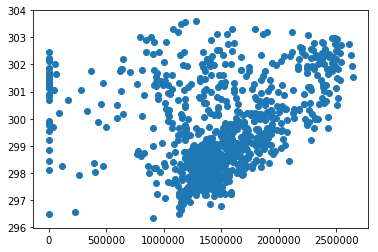

In [48]:
plt.scatter(y['power_all'].values, y['T-1'].values)

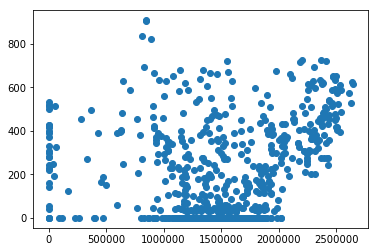

In [35]:
plt.scatter(y['power_all'].values, y['irr-1'].values)

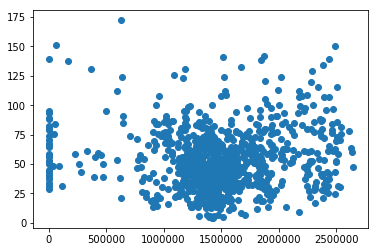

In [36]:
plt.scatter(y['power_all'].values, y['cloud-1'].values)

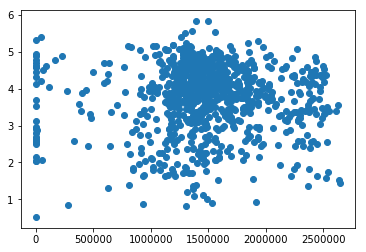

In [37]:
plt.scatter(y['power_all'].values, y['v3-1'].values)

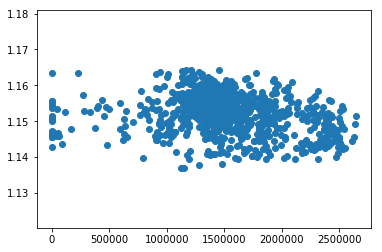

In [38]:
plt.scatter(y['power_all'].values, y['rho-1'].values)

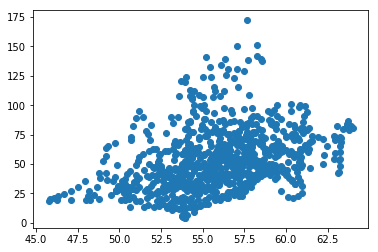

In [39]:
plt.scatter(y['V_precip-1'].values, y['cloud-1'].values)

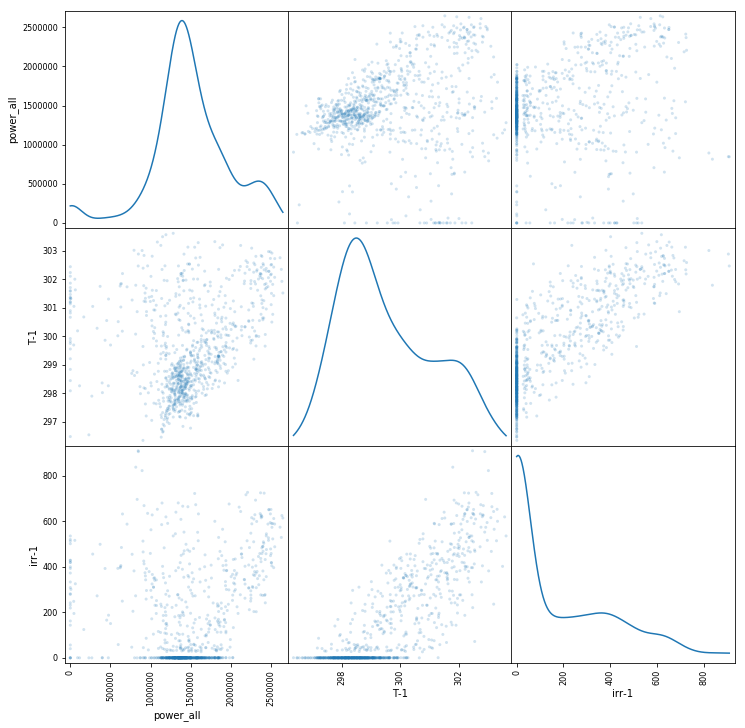

In [49]:
scatter_matrix(y, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

In [59]:
Y = y['power_all']

In [60]:
X = sm.add_constant(y['T-1'])

In [61]:
model = sm.OLS(Y, X)
result = model.fit()

In [1]:
print result.model_summary()

NameError: name 'result' is not defined